In [1]:
#import some necessary librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#for some statistics
from scipy import stats
from scipy.stats import norm, skew 

In [2]:
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn 

In [3]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density
	
LotFrontage: Linear feet of street connected to property

LotArea: Lot size in square feet

Street: Type of road access to property

       Grvl	Gravel	
       Pave	Paved
       	
Alley: Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access
		
LotShape: General shape of property

       Reg	Regular	
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular
       
LandContour: Flatness of the property

       Lvl	Near Flat/Level	
       Bnk	Banked - Quick and significant rise from street grade to building
       HLS	Hillside - Significant slope from side to side
       Low	Depression
		
Utilities: Type of utilities available
		
       AllPub	All public Utilities (E,G,W,& S)	
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	Electricity only	
	
LotConfig: Lot configuration

       Inside	Inside lot
       Corner	Corner lot
       CulDSac	Cul-de-sac
       FR2	Frontage on 2 sides of property
       FR3	Frontage on 3 sides of property
	
LandSlope: Slope of property
		
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope
	
Neighborhood: Physical locations within Ames city limits

       Blmngtn	Bloomington Heights
       Blueste	Bluestem
       BrDale	Briardale
       BrkSide	Brookside
       ClearCr	Clear Creek
       CollgCr	College Creek
       Crawfor	Crawford
       Edwards	Edwards
       Gilbert	Gilbert
       IDOTRR	Iowa DOT and Rail Road
       MeadowV	Meadow Village
       Mitchel	Mitchell
       Names	North Ames
       NoRidge	Northridge
       NPkVill	Northpark Villa
       NridgHt	Northridge Heights
       NWAmes	Northwest Ames
       OldTown	Old Town
       SWISU	South & West of Iowa State University
       Sawyer	Sawyer
       SawyerW	Sawyer West
       Somerst	Somerset
       StoneBr	Stone Brook
       Timber	Timberland
       Veenker	Veenker
			
Condition1: Proximity to various conditions
	
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
	
Condition2: Proximity to various conditions (if more than one is present)
		
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
	
BldgType: Type of dwelling
		
       1Fam	Single-family Detached	
       2FmCon	Two-family Conversion; originally built as one-family dwelling
       Duplx	Duplex
       TwnhsE	Townhouse End Unit
       TwnhsI	Townhouse Inside Unit
	
HouseStyle: Style of dwelling
	
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level
	
OverallQual: Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor
	
OverallCond: Rates the overall condition of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average	
       5	Average
       4	Below Average	
       3	Fair
       2	Poor
       1	Very Poor
		
YearBuilt: Original construction date

YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)

RoofStyle: Type of roof

       Flat	Flat
       Gable	Gable
       Gambrel	Gabrel (Barn)
       Hip	Hip
       Mansard	Mansard
       Shed	Shed
		
RoofMatl: Roof material

       ClyTile	Clay or Tile
       CompShg	Standard (Composite) Shingle
       Membran	Membrane
       Metal	Metal
       Roll	Roll
       Tar&Grv	Gravel & Tar
       WdShake	Wood Shakes
       WdShngl	Wood Shingles
		
Exterior1st: Exterior covering on house

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast	
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
	
Exterior2nd: Exterior covering on house (if more than one material)

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
	
MasVnrType: Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone
	
MasVnrArea: Masonry veneer area in square feet

ExterQual: Evaluates the quality of the material on the exterior 
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
ExterCond: Evaluates the present condition of the material on the exterior
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
Foundation: Type of foundation
		
       BrkTil	Brick & Tile
       CBlock	Cinder Block
       PConc	Poured Contrete	
       Slab	Slab
       Stone	Stone
       Wood	Wood
		
BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement
		
BsmtCond: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement
	
BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement
	
BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement
		
BsmtFinSF1: Type 1 finished square feet

BsmtFinType2: Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

BsmtFinSF2: Type 2 finished square feet

BsmtUnfSF: Unfinished square feet of basement area

TotalBsmtSF: Total square feet of basement area

Heating: Type of heating
		
       Floor	Floor Furnace
       GasA	Gas forced warm air furnace
       GasW	Gas hot water or steam heat
       Grav	Gravity furnace	
       OthW	Hot water or steam heat other than gas
       Wall	Wall furnace
		
HeatingQC: Heating quality and condition

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
CentralAir: Central air conditioning

       N	No
       Y	Yes
		
Electrical: Electrical system

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed
		
1stFlrSF: First Floor square feet
 
2ndFlrSF: Second floor square feet

LowQualFinSF: Low quality finished square feet (all floors)

GrLivArea: Above grade (ground) living area square feet

BsmtFullBath: Basement full bathrooms

BsmtHalfBath: Basement half bathrooms

FullBath: Full bathrooms above grade

HalfBath: Half baths above grade

Bedroom: Bedrooms above grade (does NOT include basement bedrooms)

Kitchen: Kitchens above grade

KitchenQual: Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       	
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

Functional: Home functionality (Assume typical unless deductions are warranted)

       Typ	Typical Functionality
       Min1	Minor Deductions 1
       Min2	Minor Deductions 2
       Mod	Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only
		
Fireplaces: Number of fireplaces

FireplaceQu: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace
		
GarageType: Garage location
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage
		
GarageYrBlt: Year garage was built
		
GarageFinish: Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage
		
GarageCars: Size of garage in car capacity

GarageArea: Size of garage in square feet

GarageQual: Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
GarageCond: Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
PavedDrive: Paved driveway

       Y	Paved 
       P	Partial Pavement
       N	Dirt/Gravel
		
WoodDeckSF: Wood deck area in square feet

OpenPorchSF: Open porch area in square feet

EnclosedPorch: Enclosed porch area in square feet

3SsnPorch: Three season porch area in square feet

ScreenPorch: Screen porch area in square feet

PoolArea: Pool area in square feet

PoolQC: Pool quality
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool
		
Fence: Fence quality
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence
	
MiscFeature: Miscellaneous feature not covered in other categories
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None
		
MiscVal: $Value of miscellaneous feature

MoSold: Month Sold (MM)

YrSold: Year Sold (YYYY)

SaleType: Type of sale
		
       WD 	Warranty Deed - Conventional
       CWD	Warranty Deed - Cash
       VWD	Warranty Deed - VA Loan
       New	Home just constructed and sold
       COD	Court Officer Deed/Estate
       Con	Contract 15% Down payment regular terms
       ConLw	Contract Low Down payment and low interest
       ConLI	Contract Low Interest
       ConLD	Contract Low Down
       Oth	Other
		
SaleCondition: Condition of sale

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)


In [4]:
train_data.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
#check the data size
print("Train Data size is : {} ".format(train_data.shape)) 
print("Test Data size is : {} ".format(test_data.shape))

Train Data size is : (1460, 81) 
Test Data size is : (1459, 80) 


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [7]:
train_data.isnull().sum().sort_values(ascending = False)[:20]

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
Utilities          0
dtype: int64

#### Note:
1. 19 features have missing values.

In [8]:
test_data.isnull().sum().sort_values(ascending = False)[:34]

PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
FireplaceQu      730
LotFrontage      227
GarageCond        78
GarageQual        78
GarageYrBlt       78
GarageFinish      78
GarageType        76
BsmtCond          45
BsmtQual          44
BsmtExposure      44
BsmtFinType1      42
BsmtFinType2      42
MasVnrType        16
MasVnrArea        15
MSZoning           4
BsmtHalfBath       2
Utilities          2
Functional         2
BsmtFullBath       2
BsmtFinSF2         1
BsmtFinSF1         1
Exterior2nd        1
BsmtUnfSF          1
TotalBsmtSF        1
SaleType           1
Exterior1st        1
KitchenQual        1
GarageArea         1
GarageCars         1
HouseStyle         0
dtype: int64

#### Note:
1. 34 test data features have missing values

In [9]:
train_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [10]:
train_data._get_numeric_data().columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [11]:
set(train_data.columns) - set(train_data._get_numeric_data().columns)

{'Alley',
 'BldgType',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtQual',
 'CentralAir',
 'Condition1',
 'Condition2',
 'Electrical',
 'ExterCond',
 'ExterQual',
 'Exterior1st',
 'Exterior2nd',
 'Fence',
 'FireplaceQu',
 'Foundation',
 'Functional',
 'GarageCond',
 'GarageFinish',
 'GarageQual',
 'GarageType',
 'Heating',
 'HeatingQC',
 'HouseStyle',
 'KitchenQual',
 'LandContour',
 'LandSlope',
 'LotConfig',
 'LotShape',
 'MSZoning',
 'MasVnrType',
 'MiscFeature',
 'Neighborhood',
 'PavedDrive',
 'PoolQC',
 'RoofMatl',
 'RoofStyle',
 'SaleCondition',
 'SaleType',
 'Street',
 'Utilities'}

## Univariate Analysis

### Target Variable-SalePrice


 mu = 180921.20 and sigma = 79415.29



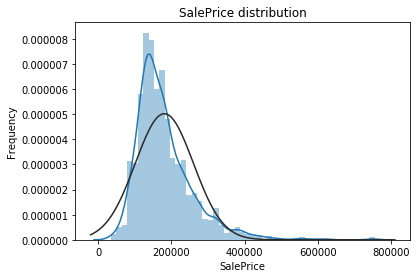

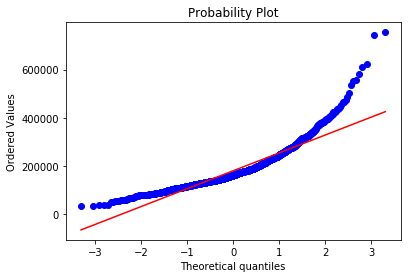

In [12]:
sns.distplot(train_data['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train_data['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train_data['SalePrice'], plot=plt)
plt.show()

In [13]:
#skewness and kurtosis
print("Skewness: %f" % train_data['SalePrice'].skew())
print("Kurtosis: %f" % train_data['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


#### Note:
1. As seen from above, the value of skewness is > 0 and hence is right skewed.  
2. For linear models the data has to be normally distributed, we will apply log1p transformation to normally distribute it.

 ### Applying Log-transformation to the target variable


 mu = 12.02 and sigma = 0.40



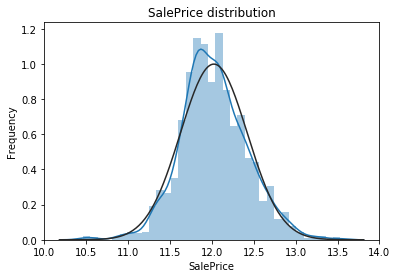

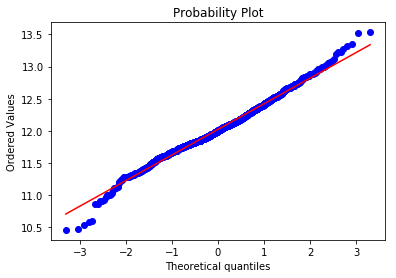

In [14]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
train_data["SalePrice"] = np.log1p(train_data["SalePrice"])

#Check the new distribution 
sns.distplot(train_data['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train_data['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train_data['SalePrice'], plot=plt)
plt.show()


In [15]:
#skewness and kurtosis
print("Skewness: %f" % train_data['SalePrice'].skew())
print("Kurtosis: %f" % train_data['SalePrice'].kurt())

Skewness: 0.121347
Kurtosis: 0.809519


Note:
1. A log transformation to all the non-zero observations, ignoring those with value zero was done. This way the data was  transformed, without losing the effect of having or not basement.

2. If the house has a basement then we add them to a different column, else ignore it.
3. The skew value now is near 0 and is almost normally distributed. 

## Feature Extraction

In [16]:
# Adding total sqfootage feature 
train_data['TotalSF'] = train_data['TotalBsmtSF'] + train_data['1stFlrSF'] + train_data['2ndFlrSF']
test_data['TotalSF'] = test_data['TotalBsmtSF'] + test_data['1stFlrSF'] + test_data['2ndFlrSF']

In [17]:
train_data.isnull().sum().sort_values(ascending = False)[:20]

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageQual        81
GarageCond        81
GarageFinish      81
GarageType        81
GarageYrBlt       81
BsmtExposure      38
BsmtFinType2      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
RoofStyle          0
dtype: int64

In [18]:
test_data.isnull().sum().sort_values(ascending = False)[:30]

PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
FireplaceQu      730
LotFrontage      227
GarageYrBlt       78
GarageQual        78
GarageCond        78
GarageFinish      78
GarageType        76
BsmtCond          45
BsmtExposure      44
BsmtQual          44
BsmtFinType1      42
BsmtFinType2      42
MasVnrType        16
MasVnrArea        15
MSZoning           4
Functional         2
Utilities          2
BsmtHalfBath       2
BsmtFullBath       2
BsmtUnfSF          1
BsmtFinSF2         1
TotalBsmtSF        1
BsmtFinSF1         1
Exterior2nd        1
Exterior1st        1
TotalSF            1
dtype: int64

## Data Correlation


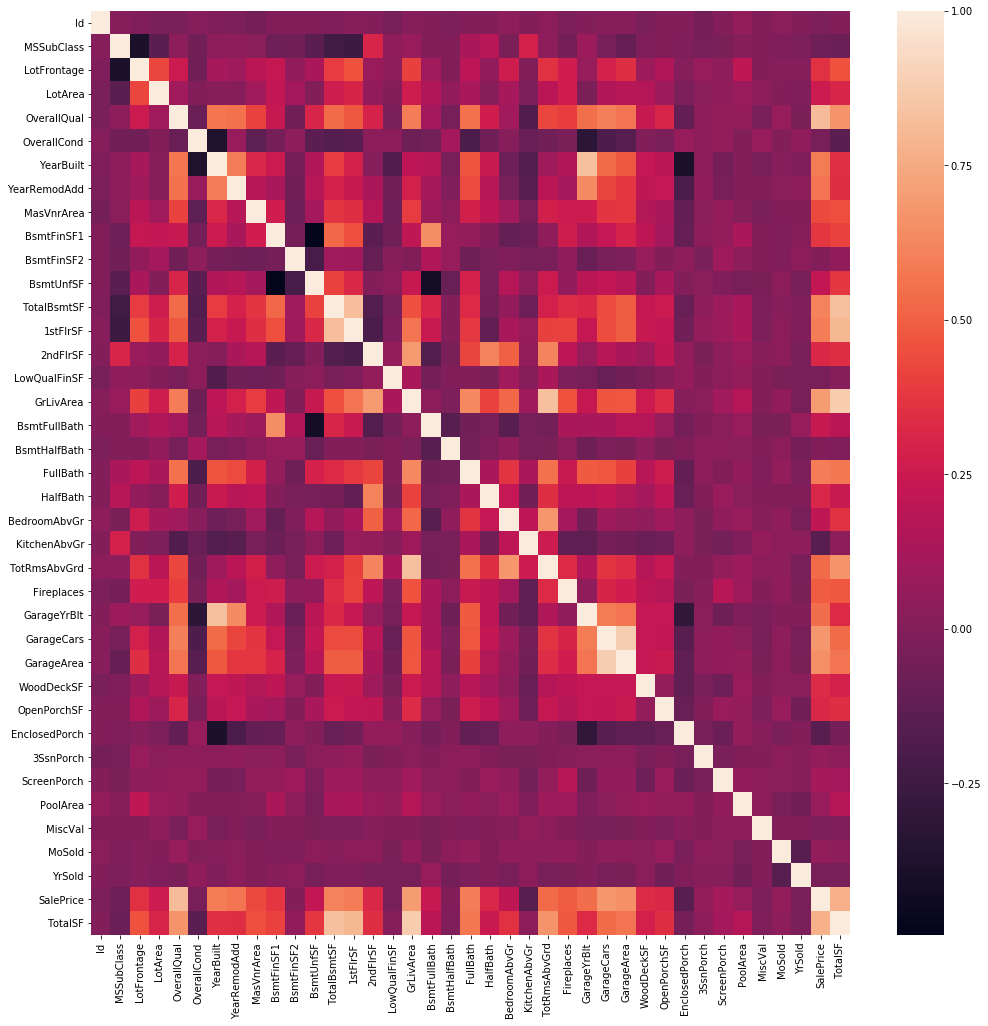

In [19]:
plt.figure(figsize=(17,17))
sns.heatmap(train_data.corr())

Note
1. In linear models a high correlation amongst variables is undesirable. A high correlation between variables is known as multicollinearity
2. From the correlation plot we can see:
 - A high correlation exists between-
     - YearBuilt and GarageYrBlt
     - GrLivArea and TotRmsAbvGrd
     - GarageCars and GarageArea
     - TotalBsmtSF and 1stFlrSF
3. A low correlation between the target variable and independent variables is undesirable. This is because a low correlation would indicate that the contribution of such independent variables to the target variable is less
   - A low correlation exists between-
     - MSubClass and SalePrice
     - OverallCond and SalePrice
     - BsmtFinSF2 and SalePrice
     - LowQualFinSF and SalePrice
     - KitchenAbvGr and SalePrice
     - EnclosedPorch and SalePrice
     - 3SsnPorch and SalePrice
     - ScreenPorch and SalePrice
     - PoolArea and SalePrice
     - MiscVal and SalePrice
     - MoSold and SalePrice
     - YrSold and SalePrice

### To see the correlation values the annot attribute of the heatmap is very helpful

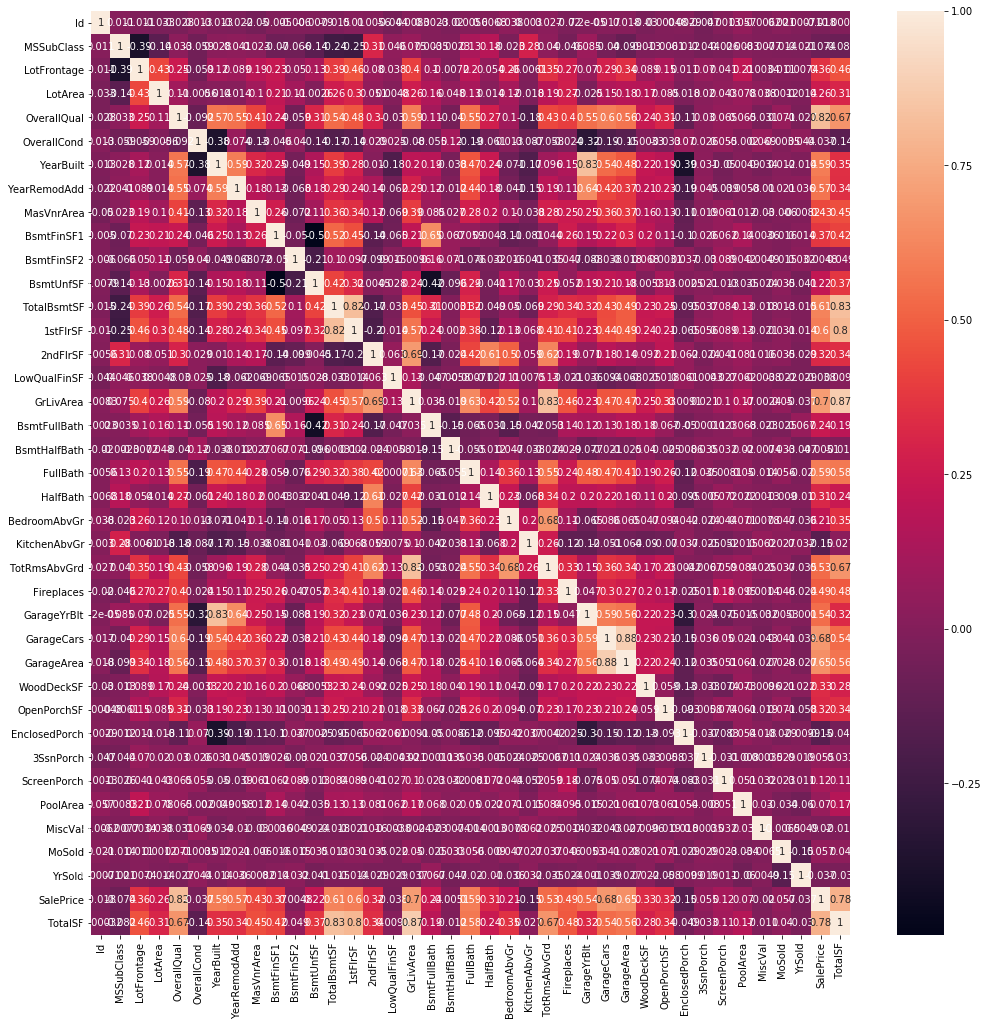

In [20]:
plt.figure(figsize=(17,17))
sns.heatmap(train_data.corr(),annot=True)

### The plot with correlation values looks very cramped up. So lets reduce the values

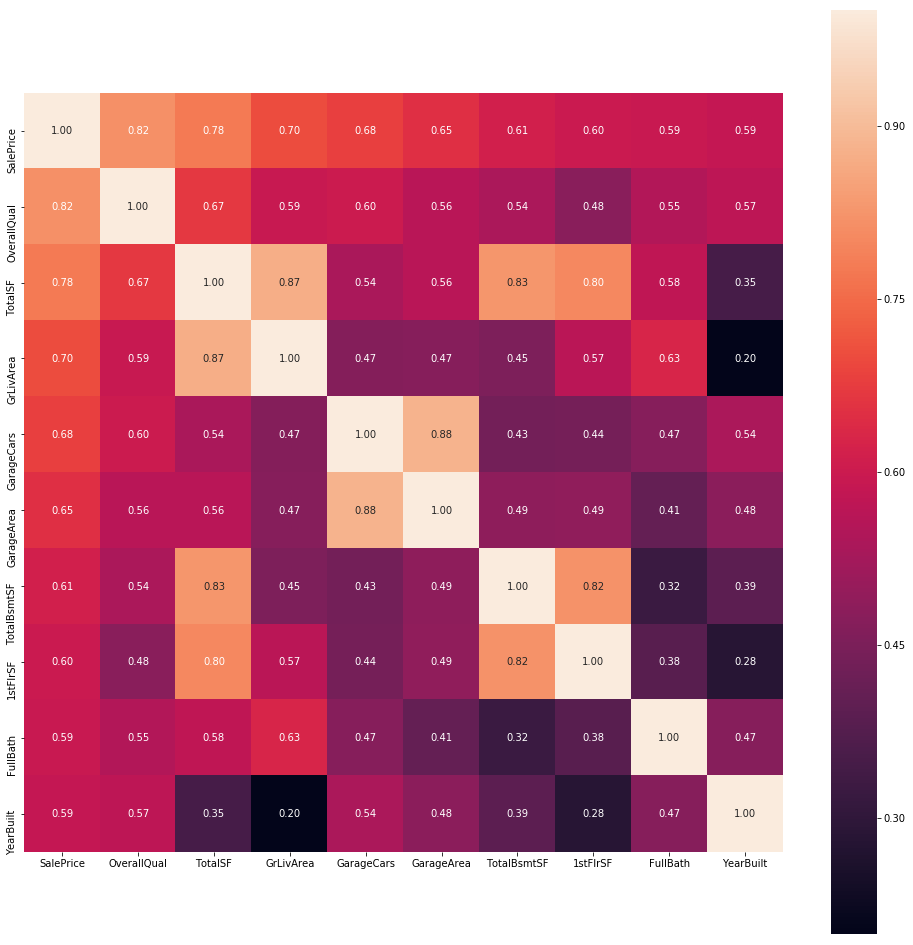

In [21]:
#saleprice correlation matrix
plt.figure(figsize=(17,17))
k = 10 #number of variables for heatmap
cols = train_data.corr().nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train_data[cols].values.T)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [22]:
train_data.corr()['SalePrice'].sort_values(ascending=False)[:21]

SalePrice       1.000000
OverallQual     0.817185
TotalSF         0.777297
GrLivArea       0.700927
GarageCars      0.680625
GarageArea      0.650888
TotalBsmtSF     0.612134
1stFlrSF        0.596981
FullBath        0.594771
YearBuilt       0.586570
YearRemodAdd    0.565608
GarageYrBlt     0.541073
TotRmsAbvGrd    0.534422
Fireplaces      0.489450
MasVnrArea      0.430809
BsmtFinSF1      0.372023
LotFrontage     0.355879
WoodDeckSF      0.334135
OpenPorchSF     0.321053
2ndFlrSF        0.319300
HalfBath        0.313982
Name: SalePrice, dtype: float64

### Note
1. The top 10 ten correlated features with the target variable is shown above with the highest correlation between OverallQual and SalePrice

In [23]:
pd.options.display.max_columns = 100
train_data.corr().nlargest(10, 'SalePrice')

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,TotalSF
SalePrice,-0.017942,-0.073959,0.355879,0.257320,0.817185,-0.036868,0.586570,0.565608,0.430809,0.372023,0.004832,0.221985,0.612134,0.596981,0.319300,-0.037963,0.700927,0.236224,-0.005149,0.594771,0.313982,0.209043,-0.147548,0.534422,0.489450,0.541073,0.680625,0.650888,0.334135,0.321053,-0.149050,0.054900,0.121208,0.069798,-0.020021,0.057330,-0.037263,1.000000,0.777297
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.547766,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.817185,0.668155
TotalSF,-0.000322,-0.082225,0.461464,0.307234,0.668155,-0.143814,0.347133,0.342873,0.448528,0.415843,0.048916,0.373733,0.826742,0.800350,0.342733,0.009207,0.874373,0.189158,-0.011921,0.575762,0.241429,0.354034,0.026759,0.672596,0.477765,0.322879,0.536413,0.563747,0.283610,0.342108,-0.048761,0.033414,0.108437,0.172466,-0.011186,0.040485,-0.029638,0.777297,1.000000
GrLivArea,0.008273,0.074853,0.402797,0.263116,0.593007,-0.079686,0.199010,0.287389,0.390857,0.208171,-0.009640,0.240257,0.454868,0.566024,0.687501,0.134683,1.000000,0.034836,-0.018918,0.630012,0.415772,0.521270,0.100063,0.825489,0.461679,0.231197,0.467247,0.468997,0.247433,0.330224,0.009113,0.020643,0.101510,0.170205,-0.002416,0.050240,-0.036526,0.700927,0.874373
GarageCars,0.016570,-0.040110,0.285691,0.154871,0.600671,-0.185758,0.537850,0.420622,0.364204,0.224054,-0.038264,0.214175,0.434585,0.439317,0.183926,-0.094480,0.467247,0.131881,-0.020891,0.469672,0.219178,0.086106,-0.050634,0.362289,0.300789,0.588920,1.000000,0.882475,0.226342,0.213569,-0.151434,0.035765,0.050494,0.020934,-0.043080,0.040522,-0.039117,0.680625,0.536413
GarageArea,0.017634,-0.098672,0.344997,0.180403,0.562022,-0.151521,0.478954,0.371600,0.373066,0.296970,-0.018227,0.183303,0.486665,0.489782,0.138347,-0.067601,0.468997,0.179189,-0.024536,0.405656,0.163549,0.065253,-0.064433,0.337822,0.269141,0.564567,0.882475,1.000000,0.224666,0.241435,-0.121777,0.035087,0.051412,0.061047,-0.027400,0.027974,-0.027378,0.650888,0.563747
TotalBsmtSF,-0.015415,-0.238518,0.392075,0.260833,0.537808,-0.171098,0.391452,0.291066,0.363936,0.522396,0.104810,0.415360,1.000000,0.819530,-0.174512,-0.033245,0.454868,0.307351,-0.000315,0.323722,-0.048804,0.050450,-0.068901,0.285573,0.339519,0.322445,0.434585,0.486665,0.232019,0.247264,-0.095478,0.037384,0.084489,0.126053,-0.018479,0.013196,-0.014969,0.612134,0.826742
1stFlrSF,0.010496,-0.251758,0.457181,0.299475,0.476224,-0.144203,0.281986,0.240379,0.344501,0.445863,0.097117,0.317987,0.819530,1.000000,-0.202646,-0.014241,0.566024,0.244671,0.001956,0.380637,-0.119916,0.127401,0.068101,0.409516,0.410531,0.233449,0.439317,0.489782,0.235459,0.211671,-0.065292,0.056104,0.088758,0.131525,-0.021096,0.031372,-0.013604,0.596981,0.800350
FullBath,0.005587,0.131608,0.198769,0.126031,0.550600,-0.194149,0.468271,0.439046,0.276833,0.058543,-0.076444,0.288886,0.323722,0.380637,0.421378,-0.000710,0.630012,-0.064512,-0.054536,1.000000,0.136381,0.363252,0.133115,0.554784,0.243671,0.484557,0.469672,0.405656,0.187703,0.259977,-0.115093,0.035353,-0.008106,0.049604,-0.014290,0.055872,-0.019669,0.594771,0.575762
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.825667,0.537850

#### Note
1. A low correlation exists between-
     - MSubClass and SalePrice -0.07
     - OverallCond and SalePrice -0.04
     - BsmtFinSF2 and SalePrice 0
     - BsmtHalfBath and SalePrice - 0.01
     - LowQualFinSF and SalePrice -0.04
     - 3SsnPorch and SalePrice 0.05
     - PoolArea and SalePrice 0.07
     - MiscVal and SalePrice -0.02
     - MoSold and SalePrice 0.06
     - YrSold and SalePrice -0.04

## Bivariate Analysis

### Numerical Variables

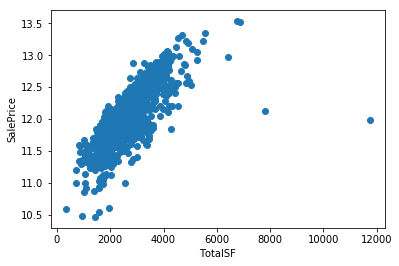

In [24]:

#scatter plot TotalSF/saleprice
plt.scatter(train_data['TotalSF'], train_data.SalePrice)
plt.xlabel('TotalSF')
plt.ylabel('SalePrice')
plt.show()

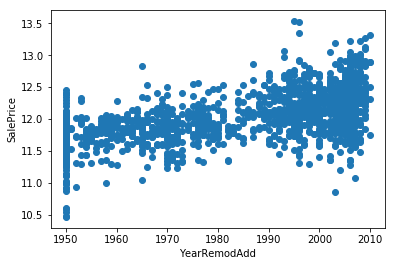

In [25]:

#scatter plot YearRemodAdd/saleprice
plt.scatter(train_data.YearRemodAdd, train_data.SalePrice)
plt.xlabel('YearRemodAdd')
plt.ylabel('SalePrice')
plt.show()

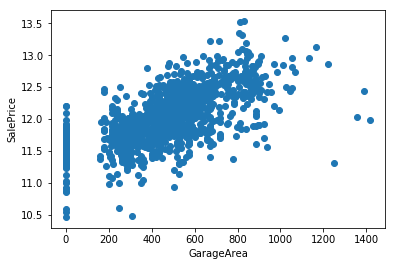

In [26]:
#scatter plot GarageArea/saleprice
plt.scatter(train_data.GarageArea, train_data.SalePrice)
plt.xlabel('GarageArea')
plt.ylabel('SalePrice')
plt.show()

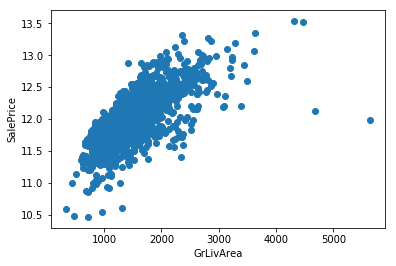

In [27]:
#scatter plot grlivarea/saleprice
plt.scatter(train_data.GrLivArea, train_data.SalePrice)
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()

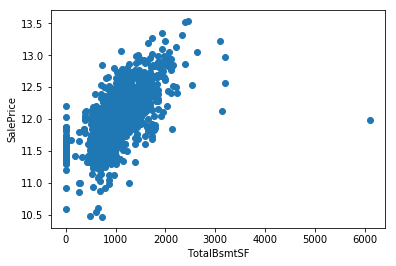

In [28]:
#scatter plot totalbsmtsf/saleprice
plt.scatter(train_data.TotalBsmtSF, train_data.SalePrice)
plt.xlabel('TotalBsmtSF')
plt.ylabel('SalePrice')
plt.show()

### Note
1. An exponential linear relationship exists between independent variables TotalBsmtSF,TotalSF and SalePrice.
2. A linear relationship exists between  SalePrice and independent variables GrLivArea,YearRemodAdd,GarageArea, 2ndFlrSF.
3. There are a few outliers but we will keep them and fine tune our models 

## Categorical features

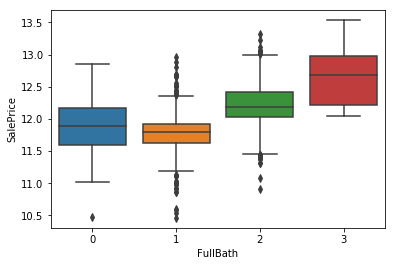

In [29]:
sns.boxplot(x='FullBath', y="SalePrice", data=train_data)

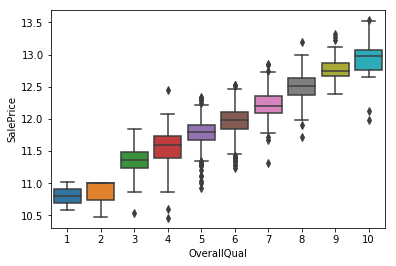

In [30]:
sns.boxplot(x='OverallQual', y="SalePrice", data=train_data)

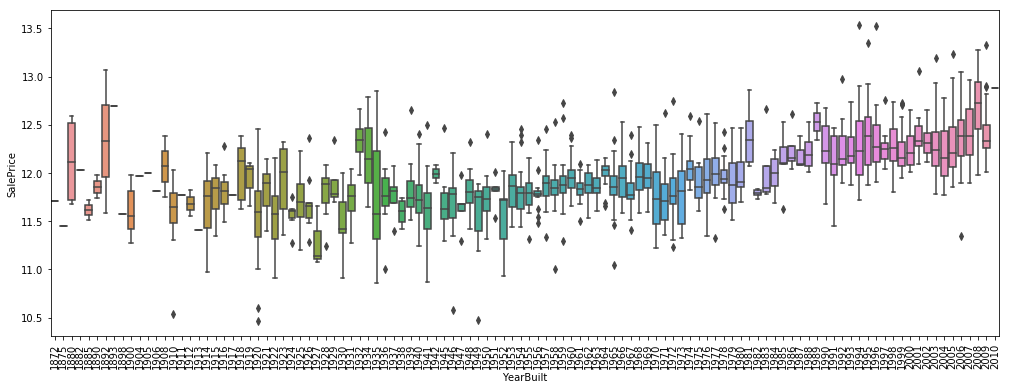

In [31]:
plt.figure(figsize=(17,6))
sns.boxplot(x='YearBuilt', y="SalePrice", data=train_data)
plt.xticks(rotation=90)
plt.show()

### Note
1.'OverallQual',FullBath and 'YearBuilt' also seem to be related with 'SalePrice'. The relationship seems to be stronger in the case of 'OverallQual', where the box plot shows how sales prices increase with the overall quality.

# Data Processing

In [32]:
train_data.shape

(1460, 82)

In [33]:
test_data.shape

(1459, 81)

### Deleting the Highly Correlated variables

In [34]:
train_data.drop(labels=['GarageYrBlt','TotRmsAbvGrd','GarageArea','1stFlrSF'],axis=1,inplace=True)
test_data.drop(labels=['GarageYrBlt','TotRmsAbvGrd','GarageArea','1stFlrSF'],axis=1,inplace=True)

### Deleting the Low Correlated variables with the Target Variable

In [35]:
train_data.drop(labels=['MSSubClass','OverallCond','BsmtFinSF2','BsmtHalfBath',
                        'LowQualFinSF','3SsnPorch','PoolArea','MiscVal',
                       'MoSold','YrSold'],axis=1,inplace=True)
test_data.drop(labels=['MSSubClass','OverallCond','BsmtFinSF2','BsmtHalfBath',
                        'LowQualFinSF','3SsnPorch','PoolArea','MiscVal',
                       'MoSold','YrSold'],axis=1,inplace=True)

In [36]:
train_data.shape

(1460, 68)

In [37]:
test_data.shape

(1459, 67)

## Missing values 

In [38]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 68 columns):
Id               1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       1452 non

#### Note
1. We can see many features are missing values. To understand it better let us find out of the percentage of missing values


In [39]:
total = train_data.isnull().sum().sort_values(ascending=False)
percent = (train_data.isnull().sum()/train_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageFinish,81,0.055479
GarageType,81,0.055479
GarageCond,81,0.055479
GarageQual,81,0.055479


In [40]:
total = test_data.isnull().sum().sort_values(ascending=False)
percent = (test_data.isnull().sum()/test_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(30)

,Total,Percent
PoolQC,1456,0.997944
MiscFeature,1408,0.965045
Alley,1352,0.926662
Fence,1169,0.801234
FireplaceQu,730,0.500343
LotFrontage,227,0.155586
GarageCond,78,0.053461
GarageQual,78,0.053461
GarageFinish,78,0.053461
GarageType,76,0.052090


#### Note:
1. 20% and above data is missing in PoolQC,MiscFeature,Alley and Fence. So we will delete these columns
2. The rest of the variables we will impute values

In [41]:
missing_data.index

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage',
       'GarageCond', 'GarageQual', 'GarageFinish', 'GarageType', 'BsmtCond',
       'BsmtExposure', 'BsmtQual', 'BsmtFinType2', 'BsmtFinType1',
       'MasVnrType', 'MasVnrArea', 'MSZoning', 'Functional', 'Utilities',
       'BsmtFullBath', 'TotalBsmtSF', 'Exterior2nd', 'Exterior1st',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalSF', 'KitchenQual', 'SaleType',
       'GarageCars', 'Electrical', 'OverallQual', 'HouseStyle', 'BldgType',
       'Condition2', 'Condition1', 'Neighborhood', 'LandSlope', 'LotConfig',
       'YearRemodAdd', 'OpenPorchSF', 'LandContour', 'LotShape',
       'EnclosedPorch', 'Street', 'LotArea', 'ScreenPorch', 'YearBuilt',
       'RoofStyle', 'CentralAir', 'RoofMatl', 'HeatingQC', 'Heating',
       '2ndFlrSF', 'GrLivArea', 'SaleCondition', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'Foundation', 'ExterCond', 'ExterQual',
       'Fireplaces', 'PavedDrive', 'WoodDeckSF', 


## Dropping 'PoolQC', 'MiscFeature', 'Alley', 'Fence'.

In [42]:
train_data.drop(labels=['PoolQC', 'MiscFeature', 'Alley', 'Fence'],axis=1,inplace=True)

test_data.drop(labels=['PoolQC', 'MiscFeature', 'Alley', 'Fence'],axis=1,inplace=True)

In [43]:
train_data.shape

(1460, 64)

In [44]:
test_data.shape

(1459, 63)

## Imputing Missing Values

### None or 0

- **FireplaceQu** : As per data description, NA means "no fireplace"

In [45]:
train_data["FireplaceQu"] = train_data["FireplaceQu"].fillna("None")
test_data["FireplaceQu"] = test_data["FireplaceQu"].fillna("None")

- **GarageType, GarageFinish, GarageQual and GarageCond** : Replacing missing data with None

In [46]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    train_data[col] = train_data[col].fillna('None')
    test_data[col] = test_data[col].fillna('None')

- **GarageCars** : Replacing missing data with 0 (Since No garage cars = 0 cars.)


In [47]:
train_data['GarageCars'] = train_data['GarageCars'].fillna(0)
test_data['GarageCars'] = test_data['GarageCars'].fillna(0)

- **BsmtFinSF1, BsmtUnfSF, TotalBsmtSF, BsmtFullBath** : missing values most likely mean no basement

In [48]:
for col in ('BsmtFinSF1', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath','TotalSF'):
    train_data[col] = train_data[col].fillna(0)
    test_data[col] = test_data[col].fillna(0)

- **BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2** :NaN means that there is no  basement.


In [49]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    train_data[col] = train_data[col].fillna('None')
    test_data[col] = test_data[col].fillna('None')

- **MasVnrArea and MasVnrType** : NA most likely be filled with 0 for No area and None for no masonry veneer. 


In [50]:
train_data["MasVnrType"] = train_data["MasVnrType"].fillna("None")
train_data["MasVnrArea"] = train_data["MasVnrArea"].fillna(0)

test_data["MasVnrType"] = test_data["MasVnrType"].fillna("None")
test_data["MasVnrArea"] = test_data["MasVnrArea"].fillna(0)

- **Functional** : As per data description, NA means typical

In [51]:
train_data['Functional'] = train_data['Functional'].fillna('Typical')
test_data['Functional'] = test_data['Functional'].fillna('Typical')

### Mode

- **MSZoning ** 


In [52]:
test_data['MSZoning'] = test_data['MSZoning'].fillna(train_data['MSZoning'].mode()[0])
train_data['MSZoning'] = train_data['MSZoning'].fillna(train_data['MSZoning'].mode()[0])

- **Electrical** 

In [53]:
test_data['Electrical'] = test_data['Electrical'].fillna(train_data['Electrical'].mode()[0])
train_data['Electrical'] = train_data['Electrical'].fillna(train_data['Electrical'].mode()[0])

- **KitchenQual**


In [54]:
test_data['KitchenQual'] = test_data['KitchenQual'].fillna(train_data['KitchenQual'].mode()[0])
train_data['KitchenQual'] = train_data['KitchenQual'].fillna(train_data['KitchenQual'].mode()[0])

- **Exterior1st** 


In [55]:
test_data['Exterior1st'] = test_data['Exterior1st'].fillna(train_data['Exterior1st'].mode()[0])
train_data['Exterior1st'] = train_data['Exterior1st'].fillna(train_data['Exterior1st'].mode()[0])


-  **Exterior2nd**

In [56]:
test_data['Exterior2nd'] = test_data['Exterior2nd'].fillna(train_data['Exterior2nd'].mode()[0])
train_data['Exterior2nd'] = train_data['Exterior2nd'].fillna(train_data['Exterior2nd'].mode()[0])

- **SaleType**

In [57]:
test_data['SaleType'] = test_data['SaleType'].fillna(train_data['SaleType'].mode()[0])
train_data['SaleType'] = train_data['SaleType'].fillna(train_data['SaleType'].mode()[0])

### Median or Mean

- **LotFrontage** : Related with Neighbourhood so we will substitute missing values with median or mean LotFrontage of the neighborhood.

In [58]:
combined_df = train_data.append(test_data)
combined_df.reset_index(inplace=True)
combined_df.drop(['index'], inplace=True, axis=1)

In [59]:
def impute_mean_median(x,train_df):
    #print(x.name)
    mean = train_df[train_df["Neighborhood"] == x.name]["LotFrontage"].mean()
    median = train_df[train_df["Neighborhood"] == x.name]["LotFrontage"].median()
    #print('mean:',mean)
    #print('median:',median)
    if ((mean-median <= 0.2)& (mean-median >= 0)):
        #print('mean1:',mean)
        x.fillna(mean,inplace =True) 
    else:
        #print('median1:',median)
        x.fillna(median,inplace =True)
    return x
    
combined_df.LotFrontage = combined_df.groupby("Neighborhood")["LotFrontage"].apply(lambda x:impute_mean_median(x,train_data))

In [60]:
train_data = combined_df[0:1460]
test_data = combined_df[1460:]

### No Variation so dropping

- **Utilities** :Almost no variation in this feature with most values being "AllPub", except for one "NoSeWa"  and 2 NA . 


In [61]:

train_data.drop(labels=['Utilities'],axis=1,inplace=True)

test_data.drop(labels=['Utilities'],axis=1,inplace=True)

In [62]:
train_data.shape

(1460, 63)

In [63]:
test_data.shape

(1459, 63)

In [64]:
total = test_data.isnull().sum().sort_values(ascending=False)
percent = (test_data.isnull().sum()/test_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(30)

,Total,Percent
SalePrice,1459,1.0
YearRemodAdd,0,0.0
EnclosedPorch,0,0.0
GarageQual,0,0.0
GarageFinish,0,0.0
GarageCond,0,0.0
GarageCars,0,0.0
Functional,0,0.0
FullBath,0,0.0
Foundation,0,0.0


In [65]:
total = train_data.isnull().sum().sort_values(ascending=False)
percent = (train_data.isnull().sum()/train_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(30)

,Total,Percent
YearRemodAdd,0,0.0
EnclosedPorch,0,0.0
GarageQual,0,0.0
GarageFinish,0,0.0
GarageCond,0,0.0
GarageCars,0,0.0
Functional,0,0.0
FullBath,0,0.0
Foundation,0,0.0
Fireplaces,0,0.0


**Label Encoding some categorical variables that may contain information in their ordering set** 

In [66]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'CentralAir')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder()
    lbl1  = LabelEncoder()
    lbl.fit(list(train_data[c].values)) 
    lbl1.fit(list(test_data[c].values)) 
    train_data[c] = lbl.transform(list(train_data[c].values))
    test_data[c] = lbl1.transform(list(test_data[c].values))
    
# shape        
print('Shape train_data: {}'.format(train_data.shape))
print('Shape test_data: {}'.format(test_data.shape))



Shape train_data: (1460, 63)
Shape test_data: (1459, 63)


In [67]:
total = train_data.isnull().sum().sort_values(ascending=False)
percent = (train_data.isnull().sum()/train_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(30)

,Total,Percent
YearRemodAdd,0,0.0
EnclosedPorch,0,0.0
GarageQual,0,0.0
GarageFinish,0,0.0
GarageCond,0,0.0
GarageCars,0,0.0
Functional,0,0.0
FullBath,0,0.0
Foundation,0,0.0
Fireplaces,0,0.0


In [68]:
combined_df = train_data.append(test_data)
combined_df.reset_index(inplace=True)
combined_df.drop(['index'], inplace=True, axis=1)

### HAnding Skewness

In [ ]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    combined_df[feat] = boxcox1p(combined_df[feat], lam)

**Getting dummy categorical features**

In [69]:

combined_df = pd.get_dummies(combined_df)
print(combined_df.shape)


(2919, 201)


In [75]:
train_data = combined_df[0:1460]
test_data = combined_df[1460:]

### Standardization

In [76]:
train_data.drop("Id", axis = 1, inplace = True)
test_data.drop(labels=["Id",'SalePrice'], axis = 1, inplace = True)

In [77]:
from sklearn.preprocessing import StandardScaler
train_df=train_data.copy(deep=True)
test_df=test_data.copy(deep=True)
train_df.drop('SalePrice', axis = 1, inplace = True)
for c in train_df.columns:
    #print(c)
    #print(train_data.loc[:,c])
    stand_scale= StandardScaler()
    train_df.loc[:,[c]] = stand_scale.fit_transform(train_df.loc[:,[c]])

for c in test_df.columns:
    #print(c)
    #print(train_data.loc[:,c])
    stand_scale= StandardScaler()
    test_df.loc[:,[c]] = stand_scale.fit_transform(test_df.loc[:,[c]])

train_df.head()

,2ndFlrSF,BedroomAbvGr,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtQual,BsmtUnfSF,CentralAir,EnclosedPorch,ExterCond,ExterQual,FireplaceQu,Fireplaces,FullBath,Functional,GarageCars,GarageCond,GarageFinish,GarageQual,GrLivArea,HalfBath,HeatingQC,KitchenAbvGr,KitchenQual,LandSlope,LotArea,LotFrontage,LotShape,MasVnrArea,OpenPorchSF,OverallQual,PavedDrive,ScreenPorch,Street,TotalBsmtSF,TotalSF,WoodDeckSF,YearBuilt,YearRemodAdd,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,Condition1_Artery,Condition1_Feedr,Condition1_Norm,...,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,1.161852,0.163779,0.325405,0.591905,0.575425,-0.510942,0.344051,1.107810,-0.566939,-0.944591,0.263813,-0.359325,0.364207,-0.777976,-0.075117,-0.951226,0.789741,0.255978,0.311725,0.295349,0.103495,0.315602,0.370333,1.227585,-0.884658,-0.211454,-0.409369,-0.225716,-0.207142,-0.231877,0.750731,0.514104,0.216503,0.651479,0.289745,-0.270208,0.064238,-0.459303,-0.001277,-0.752176,1.050994,0.878668,0.443533,-0.147287,-0.192177,-0.1742,-0.291025,-0.184376,-0.242360,0.39841,...,-0.139832,2.955221,-0.190252,-0.271163,-0.239176,-0.16125,-0.10854,-0.186352,-0.426833,-0.078757,-0.229416,-0.169981,-0.235958,-0.289638,-0.131991,-0.231065,-0.205214,-0.250182,-0.131991,-0.163471,-0.087129,-0.02618,0.134652,-0.02618,-0.02618,-0.02618,-0.087129,-0.058621,-0.064238,-0.094785,0.528753,-0.087129,-0.49357,-0.069409,-0.037037,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995,-0.1742,-0.052414,-0.037037,-0.078757,-0.058621,-0.058621,-0.301962,-0.045376,0.390293
1,-0.795163,0.163779,0.325405,-1.124444,1.171992,-1.399536,0.344051,-0.819964,-0.566939,-0.641228,0.263813,-0.359325,0.364207,0.663451,1.638498,0.600495,0.789741,0.255978,0.311725,0.295349,0.103495,0.315602,-0.482512,-0.761621,-0.884658,-0.211454,0.795629,-0.225716,-0.091886,0.437043,0.750731,-0.570750,-0.704483,-0.071836,0.289745,-0.270208,0.064238,0.466465,-0.052407,1.626195,0.156734,-0.429577,0.443533,-0.147287,-0.192177,-0.1742,-0.291025,-0.184376,4.126099,-2.50998,...,-0.139832,-0.338384,-0.190252,-0.271163,-0.239176,-0.16125,-0.10854,-0.186352,-0.426833,-0.078757,-0.229416,-0.169981,-0.235958,-0.289638,-0.131991,-0.231065,-0.205214,-0.250182,-0.131991,-0.163471,11.477250,-0.02618,0.134652,-0.02618,-0.02618,-0.02618,-0.087129,-0.058621,-0.064238,-0.094785,0.528753,-0.087129,-0.49357,-0.069409,-0.037037,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995,-0.1742,-0.052414,-0.037037,-0.078757,-0.058621,-0.058621,-0.301962,-0.045376,0.390293
2,1.189351,0.163779,0.325405,-0.266269,0.092907,-0.510942,0.344051,1.107810,-0.566939,-0.301643,0.263813,-0.359325,0.364207,-0.777976,1.638498,0.600495,0.789741,0.255978,0.311725,0.295349,0.103495,0.315602,0.515013,1.227585,-0.884658,-0.211454,-0.409369,-0.225716,0.073480,-0.098093,-1.378933,0.325915,-0.070361,0.651479,0.289745,-0.270208,0.064238,-0.313369,0.169157,-0.752176,0.984752,0.830215,0.443533,-0.147287,-0.192177,-0.1742,-0.291025,-0.184376,-0.242360,0.39841,...,-0.139832,2.955221,-0.190252,-0.271163,-0.239176,-0.16125,-0.10854,-0.186352,-0.426833,-0.07875

In [78]:
train_df = pd.concat([train_df,train_data['SalePrice']],axis=1)

In [79]:
train_df.head()

,2ndFlrSF,BedroomAbvGr,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtQual,BsmtUnfSF,CentralAir,EnclosedPorch,ExterCond,ExterQual,FireplaceQu,Fireplaces,FullBath,Functional,GarageCars,GarageCond,GarageFinish,GarageQual,GrLivArea,HalfBath,HeatingQC,KitchenAbvGr,KitchenQual,LandSlope,LotArea,LotFrontage,LotShape,MasVnrArea,OpenPorchSF,OverallQual,PavedDrive,ScreenPorch,Street,TotalBsmtSF,TotalSF,WoodDeckSF,YearBuilt,YearRemodAdd,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,Condition1_Artery,Condition1_Feedr,Condition1_Norm,...,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SalePrice
0,1.161852,0.163779,0.325405,0.591905,0.575425,-0.510942,0.344051,1.107810,-0.566939,-0.944591,0.263813,-0.359325,0.364207,-0.777976,-0.075117,-0.951226,0.789741,0.255978,0.311725,0.295349,0.103495,0.315602,0.370333,1.227585,-0.884658,-0.211454,-0.409369,-0.225716,-0.207142,-0.231877,0.750731,0.514104,0.216503,0.651479,0.289745,-0.270208,0.064238,-0.459303,-0.001277,-0.752176,1.050994,0.878668,0.443533,-0.147287,-0.192177,-0.1742,-0.291025,-0.184376,-0.242360,0.39841,...,2.955221,-0.190252,-0.271163,-0.239176,-0.16125,-0.10854,-0.186352,-0.426833,-0.078757,-0.229416,-0.169981,-0.235958,-0.289638,-0.131991,-0.231065,-0.205214,-0.250182,-0.131991,-0.163471,-0.087129,-0.02618,0.134652,-0.02618,-0.02618,-0.02618,-0.087129,-0.058621,-0.064238,-0.094785,0.528753,-0.087129,-0.49357,-0.069409,-0.037037,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995,-0.1742,-0.052414,-0.037037,-0.078757,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,12.247699
1,-0.795163,0.163779,0.325405,-1.124444,1.171992,-1.399536,0.344051,-0.819964,-0.566939,-0.641228,0.263813,-0.359325,0.364207,0.663451,1.638498,0.600495,0.789741,0.255978,0.311725,0.295349,0.103495,0.315602,-0.482512,-0.761621,-0.884658,-0.211454,0.795629,-0.225716,-0.091886,0.437043,0.750731,-0.570750,-0.704483,-0.071836,0.289745,-0.270208,0.064238,0.466465,-0.052407,1.626195,0.156734,-0.429577,0.443533,-0.147287,-0.192177,-0.1742,-0.291025,-0.184376,4.126099,-2.50998,...,-0.338384,-0.190252,-0.271163,-0.239176,-0.16125,-0.10854,-0.186352,-0.426833,-0.078757,-0.229416,-0.169981,-0.235958,-0.289638,-0.131991,-0.231065,-0.205214,-0.250182,-0.131991,-0.163471,11.477250,-0.02618,0.134652,-0.02618,-0.02618,-0.02618,-0.087129,-0.058621,-0.064238,-0.094785,0.528753,-0.087129,-0.49357,-0.069409,-0.037037,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995,-0.1742,-0.052414,-0.037037,-0.078757,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,12.109016
2,1.189351,0.163779,0.325405,-0.266269,0.092907,-0.510942,0.344051,1.107810,-0.566939,-0.301643,0.263813,-0.359325,0.364207,-0.777976,1.638498,0.600495,0.789741,0.255978,0.311725,0.295349,0.103495,0.315602,0.515013,1.227585,-0.884658,-0.211454,-0.409369,-0.225716,0.073480,-0.098093,-1.378933,0.325915,-0.070361,0.651479,0.289745,-0.270208,0.064238,-0.313369,0.169157,-0.752176,0.984752,0.830215,0.443533,-0.147287,-0.192177,-0.1742,-0.291025,-0.184376,-0.242360,0.39841,...,2.955221,-0.190252,-0.271163,-0.239176,-0.16125,-0.10854,-0.186352,-0.426833,-0.078757,-0.229416,-0.169981

In [88]:
pd.options.display.max_columns = 200

In [89]:
combined_df.head()

,2ndFlrSF,BedroomAbvGr,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtQual,BsmtUnfSF,CentralAir,EnclosedPorch,ExterCond,ExterQual,FireplaceQu,Fireplaces,FullBath,Functional,GarageCars,GarageCond,GarageFinish,GarageQual,GrLivArea,HalfBath,HeatingQC,Id,KitchenAbvGr,KitchenQual,LandSlope,LotArea,LotFrontage,LotShape,MasVnrArea,OpenPorchSF,OverallQual,PavedDrive,SalePrice,ScreenPorch,Street,TotalBsmtSF,TotalSF,WoodDeckSF,YearBuilt,YearRemodAdd,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,...,Exterior2nd_Wd Shng,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,854,3,4,3,706.0,2,6,1.0,2,150.0,1,0,4,2,3,0,2,6,2.0,5,2,5,1710,1,0,1,1,2,0,8450,65.0,3,196.0,61,7,2,12.247699,0,1,856.0,2566.0,0,2003,2003,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,0,3,4,1,978.0,0,6,0.0,2,284.0,1,0,4,3,5,1,2,6,2.0,5,2,5,1262,0,0,2,1,3,0,9600,80.0,3,0.0,0,6,2,12.109016,0,1,1262.0,2524.0,298,1976,1976,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,

In [90]:
train_data = combined_df[0:1460]
test_data = combined_df[1460:]

In [91]:
train_data.shape

(1460, 201)

In [92]:
test_data.shape

(1459, 201)

In [74]:
train_df['SalePrice'].head()

0    0.560067
1    0.212763
2    0.734046
3   -0.437383
4    1.014651
Name: SalePrice, dtype: float64

In [93]:
train_data.to_csv('modified_train_data.csv')
test_data.to_csv('modified_test_data.csv')

In [80]:
train_df.to_csv('modified_train_data1.csv')
test_df.to_csv('modified_test_data1.csv')

Reference:
https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard